In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
import re
from collections import Counter

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
with open('kym.json', 'r', encoding='utf-8') as reader:
    memes = json.load(reader)

#### Total number of meme entries in the raw data file

In [ ]:
len(memes)

28799

#### Example of meme entry</font>

In [ ]:
print(json.dumps(memes[0], indent=4))

{
    "title": "This is Relevant To My Interests",
    "url": "https://knowyourmeme.com/memes/this-is-relevant-to-my-interests",
    "last_update_source": 1547002898,
    "category": "Meme",
    "template_image_url": "https://i.kym-cdn.com/entries/icons/original/000/000/021/relevant-to-my-interests.jpg",
    "meta": {
        "og:title": "This is Relevant To My Interests",
        "og:site_name": "Know Your Meme",
        "og:image": "https://i.kym-cdn.com/entries/icons/facebook/000/000/021/relevant-to-my-interests.jpg",
        "og:image:width": "600",
        "og:image:height": "315",
        "og:type": "article",
        "fb:app_id": "104675392961482",
        "fb:pages": "88519108736",
        "article:publisher": "https://www.facebook.com/knowyourmeme",
        "twitter:card": "summary_large_image",
        "twitter:site": "@knowyourmeme",
        "twitter:creator": "@knowyourmeme",
        "twitter:title": "This is Relevant To My Interests",
        "twitter:description": "\"This

#### Total number of distinct meme entries (by title)

In [ ]:
unique_titles = set([meme['title'] for meme in memes])
print(len(unique_titles))

16713


**Around 58% meme entries are unique**. Same goes for URLs.

### Meme categories

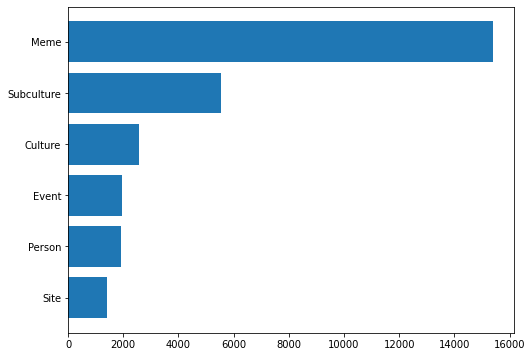

In [ ]:
categories = [meme['category'] for meme in memes]
categories_counter = {}
for cat in categories:
    if cat not in categories_counter:
        categories_counter[cat] = 0
        
    categories_counter[cat] += 1
    
categories_counter = dict(sorted(categories_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(categories_counter.keys())), categories_counter.values(), tick_label=list(categories_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

### Details Attribute Breakdown

#### Status

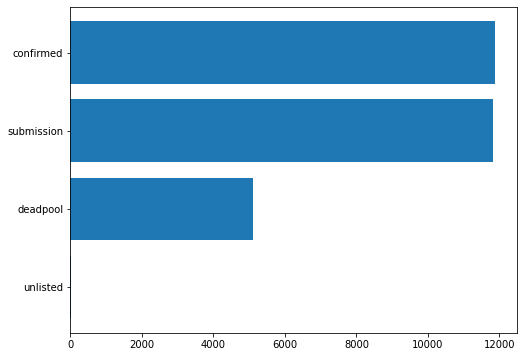

In [ ]:
status = [meme['details']['status'] for meme in memes]
status_counter = {}
for st in status:
    if st not in status_counter:
        status_counter[st] = 0
        
    status_counter[st] += 1
    
status_counter = dict(sorted(status_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(status_counter.keys())), status_counter.values(), tick_label=list(status_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Status refers to the submission status of a meme to KYM site by a registered member.

* **confirmed**: the submission is reviewed and approved
* **submission**: the submission is currenly beeing researched and evaluated
* **deadpool**: the submission has been rejected due to incompliteness or lack of notability
* **unlisted**: didn't find any description; 5/6 entries refer to the same [meme page](https://knowyourmeme.com/memes/spurdo-sparde) (marked as sensitive)

**Suggestion**: *keep only meme entries having confirmed status*

#### Origin

In [ ]:
origin = [meme['details']['origin'] for meme in memes]
origin_counter = Counter()
for orig in origin:
    origin_counter[orig] += 1
    
print('Total number of origin sources:', len(origin_counter))
print('\nTop 10 most frequent origin sources:')
for orig, cnt in origin_counter.most_common(10):
    print(f'{orig:<15}: {cnt:>4}')

Total number of origin sources: 6667

Top 10 most frequent origin sources:
Unknown        : 4141
YouTube        : 1774
4chan          : 1382
Twitter        :  895
ARPANET        :  556
Tumblr         :  554
Reddit         :  478
Facebook       :  457
France         :  358
United States  :  338


#### Type

The full list of types and categories available [here](https://knowyourmeme.com/categories)

Total number of types: 111

Top 10 most frequent types:
company        : 1246
video-game     : 1172
image-macro    :  961
slang          :  715
tv-show        :  709
exploitable    :  703
art            :  697
catchphrase    :  681
technology     :  639
viral-video    :  616


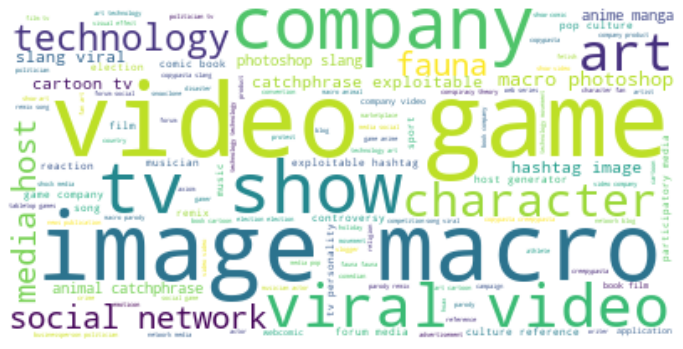

In [ ]:
from wordcloud import WordCloud


types = []
for meme in memes:
    try:
        t = meme['details']['type']
        if len(t) > 1:
            for tt in t:
                types.append(tt.split('/')[-1])
        else:
            types.append(t[0].split('/')[-1])
    except KeyError:
        pass

type_counter = Counter()
for t in types:
    type_counter[t] += 1
    
print('Total number of types:', len(type_counter))
print('\nTop 10 most frequent types:')
for t, cnt in type_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in types)
wordcloud = WordCloud(max_words=len(types), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

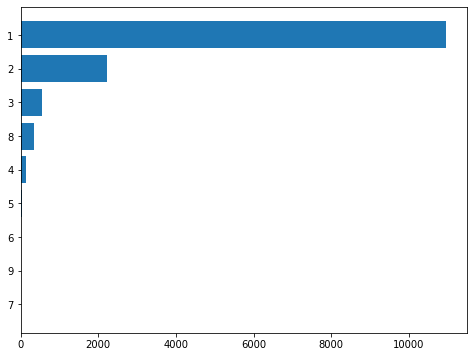

In [ ]:
t_len = []
for meme in memes:
    try:
        t = meme['details']['type']
        t_len.append(len(t))
    except KeyError:
        pass
    
    
tlen_counter = {}
for tl in t_len:
    if tl not in tlen_counter:
        tlen_counter[tl] = 0
        
    tlen_counter[tl] += 1
    
tlen_counter = dict(sorted(tlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(tlen_counter.keys())), tlen_counter.values(), tick_label=list(tlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Meme entries come from 111 various types. Most of the entries feature only one type, but others might have up to 9 types.

There are quite a few types implying *sensitive content* of the meme entry like
* crime
* disaster
* exploitable
* fetish
* religion

**Suggestion**: *filter out meme entries of types listed above.*

In [ ]:
sensitive_types = ('crime', 'disaster', 'exploitable', 'fetish', 'religion')

for t in sensitive_types:
    print(f'{t:<15}: {type_counter[t]:>4}')

crime          :   31
disaster       :   41
exploitable    :  703
fetish         :   77
religion       :   58


#### Year

In [ ]:
year = [meme['details']['year'] for meme in memes]
year_counter = Counter()
for y in year:
    try:
        year_counter[int(y)] += 1
    except:
        year_counter[y] += 1
    
print('Total number of year values:', len(year_counter)-1)
print('\nTop 10 most frequent year values:')
for y, cnt in year_counter.most_common(10):
    if y:
        print(f'{y:<5}: {cnt:>4}')

Total number of year values: 189

Top 10 most frequent year values:
2011 : 2283
2010 : 1818
2012 : 1732
2016 : 1432
2013 : 1186
2006 : 1118
2015 : 1109
2014 : 1069
2009 : 1056


In [ ]:
print('The latest emerged meme:', np.max([y for y in year_counter.keys() if y]))

The latest emerged meme: 2916


In [ ]:
print('The earliest emerged meme:', np.min([y for y in year_counter.keys() if y]))

The earliest emerged meme: 1000


* **3,177 meme entries lack year information**
* some memes are coming ahead of time (one goes as far as 2916)
* other memes dates back to medieval times (as early as 11th century)
* in fact, the concept of Internet meme was introduced back in 1993 (look [here](https://en.wikipedia.org/wiki/Internet_meme#:~:text=Internet%20memes%20grew%20as%20a%20concept%20in%20the%20mid-1990s.%20At%20the%20time%2C%20memes%20were%20just%20short%20clips%20that%20were%20shared%20between%20people%20in%20Usenet%20forums.%5Bcitation%20needed%5D))

**Suggestion**: *fix time frame for all meme entries between 1993 to 2021; those going outside should be removed*

In [ ]:
unrealistic = 0
for y in year_counter:
    if y and (y > 2021 or y < 1993):
        unrealistic += year_counter[y]
        
print(f'Total number of meme entries outside of 1993-2021 range: {unrealistic - 3177}')

Total number of meme entries outside of 1993-2021 range: 2394


### Added

Timestamp of first submission to KYM site

In [ ]:
added_dt = []
for meme in memes:
    try:
        added_dt.append(datetime.fromtimestamp(meme['added']))
    except KeyError:
        pass
    
added_year = [dt_obj.year for dt_obj in added_dt]
print('Total number of submission year values:', len(np.unique(added_year)))

print('The earliest submitted meme:', np.min(added_year))
print('The latest submitted meme:', np.max(added_year))

Total number of submission year values: 14
The earliest submitted meme: 2008
The latest submitted meme: 2021


### Tags

Total number of tags: 31000

Top 10 most frequent tags:
4chan          : 1036
youtube        :  948
meme           :  867
image macro    :  709
slang          :  682
catchphrase    :  594
twitter        :  489
japan          :  478
exploitable    :  473
tumblr         :  461


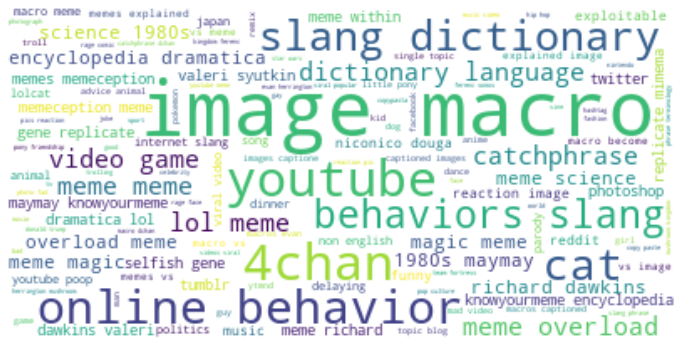

In [ ]:
tags = []

for meme in memes:
    try:
        tags += meme['tags']
    except KeyError:
        pass
    
    
tag_counter = Counter()
for t in tags:
    tag_counter[t] += 1
    
    
print('Total number of tags:', len(tag_counter))
print('\nTop 10 most frequent tags:')
for t, cnt in tag_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in tags)
wordcloud = WordCloud(max_words=len(tags), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

The tag attribute is such a mess (some tags make no sense at all); requires loads of pre-processing and some smart clustering.

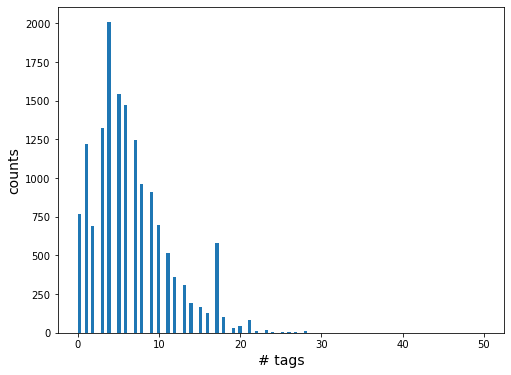

In [ ]:
tags_len = []

for meme in memes:
    try:
        tags_len.append(len(meme['tags']))
    except KeyError:
        pass
    
plt.figure(figsize=(8, 6))    
plt.hist(tags_len, bins=int(np.sqrt(len(tags_len))))
plt.xlabel('# tags', fontsize=14)
plt.ylabel('counts', fontsize=14);

Number of tags assigned to meme entries has pretty big variance (from no tags up to 50 tags); the vast majority of meme entries feature 4 tags.

### Search Keywords

Total number of search keywords: 12269

Top 10 most frequent search keywords:
internet            :  556
internet slang      :  371
Western Animation   :  340
Cartoons            :  340
meme                :  330
memes               :  330
trend               :  330
trends              :  330
idea                :  330
nintendo            :  295


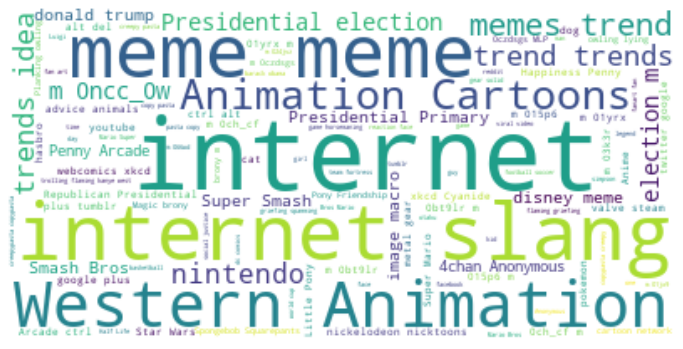

In [ ]:
skws = []
for meme in memes:
    try:
        skws += meme['search_keywords']
    except KeyError:
        pass
    
    
skw_counter = Counter()
for kw in skws:
    skw_counter[kw] += 1
    
print('Total number of search keywords:', len(skw_counter))
print('\nTop 10 most frequent search keywords:')
for kw, cnt in skw_counter.most_common(10):
    print(f'{kw:<20}: {cnt:>4}')
    
text = ' '.join(kw for kw in skws)
wordcloud = WordCloud(max_words=len(skws), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Min # search kws: 1
Max # search kws: 6


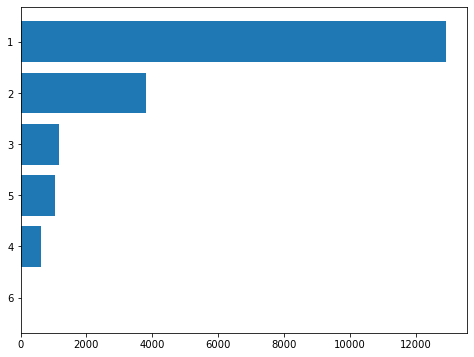

In [ ]:
skw_len = []

for meme in memes:
    try:
        skw_len.append(len(meme['search_keywords']))
    except KeyError:
        pass
    
print('Min # search kws:', min(skw_len))
print('Max # search kws:', max(skw_len))

skwlen_counter = {}
for skw in skw_len:
    if skw not in skwlen_counter:
        skwlen_counter[skw] = 0
        
    skwlen_counter[skw] += 1
    
skwlen_counter = dict(sorted(skwlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(skwlen_counter.keys())), skwlen_counter.values(), tick_label=list(skwlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Most of the meme entries have only one search keyword which is usually the same one as the meme's title. Some of the entries might have up to 6 search keywords.

## Prepare data for future analysis

In [ ]:
!pip install profanity-filter

     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 72 kB 522 kB/s 
     |████████████████████████████████| 654 kB 59.4 MB/s 
     |████████████████████████████████| 10.1 MB 12.6 MB/s 
  Created wheel for ordered-set: filename=ordered_set-3.1.1-py2.py3-none-any.whl size=7823 sha256=73ea3c6e1b5605b4d49398016826fd38181cd270cde45c53328ef5294b9b9717
  Stored in directory: /root/.cache/pip/wheels/10/91/db/f8476865ccd2187467d2926d9f965673b4886175b6babca6b9
Successfully built ordered-set


In [ ]:
!pip install stanza

     |████████████████████████████████| 432 kB 14.6 MB/s 
     |████████████████████████████████| 170 kB 50.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=588f4668b28333b6d8cca3ecc99040244b40aea60bb374751df61c3c0802ff12
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
from profanity_filter import ProfanityFilter

In [ ]:
import stanza

stanza.download('en') 

2021-12-31 12:07:45 INFO: Downloading default packages for language: en (English)...


2021-12-31 12:08:01 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
SENSITIVE = {'crime', 'disaster', 'exploitable', 'fetish', 'religion'}
SENTIMENT = {0: 'negative', 1: 'neutral', 2: 'positive'}
pf = ProfanityFilter()
nlp = stanza.Pipeline(lang='en', processors='tokenize,lemma,sentiment', verbose=False)
cleaned_memes = []

for meme in memes:
    meme_dict = {}
    if meme['category'] != 'Meme':
      continue
        
    if meme['details']['status'] != 'confirmed':
      continue

    if pf.is_profane(meme['title']):
      continue
        
    if meme['details'].get('type', None):
        if set(map(lambda link: link.split('/')[-1], meme['details']['type'])) & SENSITIVE:
          continue
    
    if meme.get('tags', None):
      if set(meme['tags']) & SENSITIVE:
        continue
        
    if meme['title'] in list(map(lambda entry: entry['title'], cleaned_memes)):
        cleaned_meme = list(filter(lambda entry: entry['title'] == meme['title'], cleaned_memes))[-1]
        if datetime.fromtimestamp(meme['last_update_source']) > datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            cleaned_memes.remove(cleaned_meme)
        elif datetime.fromtimestamp(meme['last_update_source']) == datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            continue
        else:
            continue
        
    meme_dict['title'] = meme['title']
    meme_dict['url'] = meme['url']
    meme_dict['last_update_in_kym'] = datetime.fromtimestamp(meme['last_update_source']).strftime('%Y-%m-%d %H:%M:%S')
    meme_dict['description'] = meme['meta']['description']
    meme_dict['source'] = 'Know Your Meme'
    meme_dict['added_to_kym'] = datetime.fromtimestamp(meme['added']).strftime('%Y-%m-%d')\
                                if meme.get('added', None) else None
    
    meme_dict['origin'] = meme['details']['origin']
    
    if meme['details'].get('year', None):
        if 1993 <= int(meme['details']['year']) < 2022:
            meme_dict['year'] = int(meme['details']['year'])
        else:
            meme_dict['year'] = None
    else:
        meme_dict['year'] = None
    
    meme_dict['type'] = ",".join(list(map(lambda link: link.split('/')[-1], meme['details']['type'])))\
                        if meme['details'].get('type', None) else None
    try:
        meme_dict['about'] = " ".join(meme['content']['about']['text'])

    except KeyError:
        meme_dict['about'] = None
        
    try:
        origin_references = re.findall(r'\[\d+\]', "".join(meme['content']['origin']['text']))
        spread_references = re.findall(r'\[\d+\]', "".join(meme['content']['spread']['text']))
        meme_dict['spread_counts'] = len(spread_references) # count number of external references appeared in spread description
        
        # find all occurences of dates, year specifically, mentioned in spread description
        spread_years = re.findall(r'(199\d|20[0-1]\d|202[0-1])', "".join(meme['content']['spread']['text']))
        if spread_years:
            meme_dict['spread_year_min'] = min(list(map(int, spread_years)))
            meme_dict['spread_year_max'] = max(list(map(int, spread_years)))
        else:
            meme_dict['spread_year_min'] = None
            meme_dict['spread_year_max'] = None
            
        # build a dictionary of external references
        # key - reference number in brackets, value - reference name
        exrefs_dict = {} 
        for entry in meme['content']['external references']['text']:
            try:
                num, name = entry.split('] ')
                exrefs_dict[num + ']'] = name.split(' \u2013 ')[0].strip()
            except ValueError: # not enough values to unpack
                continue
            
        # put together all reference names mentioned in the origin section into a list
        origin_names = []
        for ref in origin_references:
            origin_names.append(exrefs_dict[ref])
        
        # put together all reference names mentioned in the spread section into a list
        spread_names = []
        for ref in spread_references:
            spread_names.append(exrefs_dict[ref])
            
        meme_dict['origin_references'] = ",".join(set(origin_names))
        meme_dict['spread_references'] = ",".join(set(spread_names))
    except KeyError:
        meme_dict['spread_counts'] = 0
        meme_dict['spread_references'] = None
        meme_dict['origin_references'] = None
        
    meme_dict['tags'] = ",".join(meme['tags']) if meme.get('tags', None) else None
    meme_dict['search_keywords'] = ",".join(meme['search_keywords']) if meme.get('search_keywords', None) else None

    meme_dict['parent'] = meme.get('parent', None)
    meme_dict['siblings'] = ",".join(meme['siblings']) if meme.get('siblings', None) else None
    meme_dict['children'] = ",".join(meme['children']) if meme.get('children', None) else None

    doc = nlp(meme_dict['description'] if meme_dict['description'] else '' + meme_dict['about'] if meme_dict['about'] else '')
    if doc:
      sentiments = []
      for sentence in doc.sentences:
        sentiments.append(sentence.sentiment)
      meme_dict['sentiment'] = SENTIMENT[np.argmax(np.bincount(sentiments))]

    else:
      meme_dict['sentiment'] = None

       
    cleaned_memes.append(meme_dict)

In [ ]:
data = pd.DataFrame(cleaned_memes)

In [ ]:
data

,title,url,last_update_in_kym,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,origin_references,spread_references,tags,search_keywords,parent,siblings,children,sentiment
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 03:01:38,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,NeoGAF,"Facebook,Flickr,Tumblr,Zazzle,Urban Dictionary...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None,positive
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-05 23:38:57,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,"Inc Gamers,Wikipedia,Urban Dictionary","Daily Motion,Reddit,ROFL.name,FunnyJunk","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None,negative
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 11:28:59,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,"Wikipedia,YouTube",,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None,negative
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 13:58:19,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,"Livejournal (via Wayback Machine),AnimalPictur...",archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None,negative
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-17 21:07:48,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,None,None,"japan,yatta,happa-tai",Yatta,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,Turnt,https://knowyourmeme.com/memes/turnt,2018-07-17 21:08:05,"“Turnt”, a variation of the word “turned,” is ...",Know Your Meme,2014-12-09,Urban Dictionary,2005.0,slang,"""Turnt"", a variation of the word ""turned,"" is ...",2,2008.0,2014.0,Urban Dictionary,"BuzzFeed,Pop Dust","slang,hip hop,turnt up,turnt down",turnt,https://knowyourmeme.com/memes/internet-slang,"https://knowyourmeme.com/memes/fax-no-printer,...",None,negative
2795,Roof Koreans,https://knowyourmeme.com/memes/roof-koreans,2021-04-18 22:47:35,"Roof Koreans, also known as Rooftop Koreans, i...",Know Your Meme,2016-09-30,L.A. Riots,NaN,slang,"Roof Koreans, also known as Rooftop Koreans, i...",5,2012.0,2015.0,LA Times,"Reddit,Wayback Machine,Urban Dictionary","la riots,guns,rifles,armbritain,madmaxtrac,fau...","\""roof koreans\""",None,None,None,negative
2796,Liberal Douche Garofalo,https://knowyourmeme.com/memes/liberal-douche-...,2021-04-04 10:22:41,Liberal Douche Garofalo is an advice animal im...,Know Your Meme,2012-03-28,4chan,2009.0,None,Liberal Douche Garofalo is an advice animal st...,8,2009.0,2012.0,"Wikipedia,Photobucket","Facebook,Quickmeme,Tumblr,Urban Dictionary,Mem...","advice dog,hypocrite,liberal,janeane garofalo",Liberal Douche Garofalo,https://knowyourmeme.com/memes/advice-animals,https://knowyourmeme.com/memes/angry-advice-ma...,None,neutral
2797,Polybius,https://knowyourmeme.com/memes/polybius,2021-03-29 20:54:44,Polybius is a fictional arcad

In [ ]:
from string import punctuation


def normalize_tags(tags):
  """
  tags: a string of tags separated by comma
  """
  tags_norm = []
  if tags: # not None
    tags = tags.split(',')
    for tag in tags:
      if len(tag) > 35:
        continue

      if re.search(r'[a-zA-Z]', tag, flags=re.ASCII):
        tg = ' '.join(map(lambda word: word.lower().strip(punctuation), tag.split(' ')))
        doc = nlp(tg)
        tg = ' '.join(word.lemma for word in doc.sentences[0].words)
        tg = ' '.join(word for word in tg.split(' ') if word not in punctuation)

        if len(tg) > 1:
          tags_norm.append(tg)
      else:
        continue

    if tags_norm: return ','.join(set(tags_norm))
      
  return None



data['tags_normalized'] = data['tags'].apply(normalize_tags)

In [ ]:
data.drop(columns=['tags'], inplace=True)
data

,title,url,last_update_in_kym,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,origin_references,spread_references,search_keywords,parent,siblings,children,sentiment,tags_normalized
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 03:01:38,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,NeoGAF,"Facebook,Flickr,Tumblr,Zazzle,Urban Dictionary...","\""This is relevant to my interests\""",None,None,None,positive,"approval,image macros,comment,image macro"
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-05 23:38:57,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,"Inc Gamers,Wikipedia,Urban Dictionary","Daily Motion,Reddit,ROFL.name,FunnyJunk",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None,negative,"initialism,ascii,animated gif,acronym,rofl"
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 11:28:59,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,"Wikipedia,YouTube",,"\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None,negative,"response,reaction video,rant,freakout,leave br..."
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 13:58:19,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,"Livejournal (via Wayback Machine),AnimalPictur...",archive.tinychan,"\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None,negative,"owl,4chan,animal,catchphrase,1990,computer vir..."
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-17 21:07:48,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,None,None,Yatta,None,None,None,neutral,"japan,yatta,happa-tai"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,Turnt,https://knowyourmeme.com/memes/turnt,2018-07-17 21:08:05,"“Turnt”, a variation of the word “turned,” is ...",Know Your Meme,2014-12-09,Urban Dictionary,2005.0,slang,"""Turnt"", a variation of the word ""turned,"" is ...",2,2008.0,2014.0,Urban Dictionary,"BuzzFeed,Pop Dust",turnt,https://knowyourmeme.com/memes/internet-slang,"https://knowyourmeme.com/memes/fax-no-printer,...",None,negative,"turnt down,hip hop,turnt up,slang"
2795,Roof Koreans,https://knowyourmeme.com/memes/roof-koreans,2021-04-18 22:47:35,"Roof Koreans, also known as Rooftop Koreans, i...",Know Your Meme,2016-09-30,L.A. Riots,NaN,slang,"Roof Koreans, also known as Rooftop Koreans, i...",5,2012.0,2015.0,LA Times,"Reddit,Wayback Machine,Urban Dictionary","\""roof koreans\""",None,None,None,negative,"rifle,peecatchwho,la riot,gun,madmaxtrac,fauxt..."
2796,Liberal Douche Garofalo,https://knowyourmeme.com/memes/liberal-douche-...,2021-04-04 10:22:41,Liberal Douche Garofalo is an advice animal im...,Know Your Meme,2012-03-28,4chan,2009.0,None,Liberal Douche Garofalo is an advice animal st...,8,2009.0,2012.0,"Wikipedia,Photobucket","Facebook,Quickmeme,Tumblr,Urban Dictionary,Mem...",Liberal Douche Garofalo,https://knowyourmeme.com/memes/advice-animals,https://knowyourmeme.com/memes/angry-advice-ma...,None,neutral,"janeane garofalo,liberal,hypocrite,advice dog"
2797,Polybius,https://knowyourmeme.com/memes/polybius,2021-03-29 20:54:44,Polybius is a fictional ar